<br>

# Fundamentals of Data Analysis

## Project 2020 - Peter Finnerty

***

<br>

## Instructions:

<br>
In this project you must perform and explain simple linear regression using Python
on the powerproduction dataset available on Moodle. 

The goal is to accurately predict wind turbine power output from wind speed values using the data set as a basis.

Your submission must be in the form of a git repository containing, at a minimum, the
following items:

1. Jupyter notebook that performs simple linear regression on the data set.


2. In that notebook, an explanation of your regression and an analysis of its accuracy.


3. Standard items in a git repository such as a README.

To enhance your submission, you might consider comparing simple linear regression to
other types of regression on this data set. Rest assured, all the above concepts will be
explored in lecture videos and other materials in the coming semester.

***

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.optimize import curve_fit

from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LassoCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error

<br>

## 1. Overview

### 1.1. Defining Linear Regression

This project seeks to exemplify the use of simple linear regression on the Powerproduction dataset. In order to do this it is first necessary to provide an overview of Linear Regression. Furthermore, it is necessary to discuss how Linear Regression has applications in both Statistics and Machine Learning.

Linear Regression developed out of the field of Statistics as a way to understand the relationsip between input and output variables. As Machine Learning is concerned with minimizing the error of a model or making the most accurate predictions possible, Linear Regression algorithms became utilised in both fields (MachineLearningMastery.com). 

Algebraic Simultaneous Equations as studied in second level education, suggest that there is a linear relationship between input variables (x) and a single output variable (y) and that y can be calculation from a combination of x variables (MachineLearningMastery.com). 

At second level, Linear Regression is studied at the most basic level in the equation of a line as seen below:

<img src="https://i.pinimg.com/originals/d3/36/bd/d336bddce77d0769448561fde53b0372.jpg" style="width: 450px;">                                                                                                         

This is a useful basis from which to expand one's knowledge of Linear Regression, beyond the application in Algebra to Data Analysis and more specifically, to Simple Linear Regression on a Dataset.

In the above formula, *m* is called the angular coefficient and *c* is the intercept. When we look at a dataset, and investigate all the vectors in terms of fitting a straight line, we are searching the values of *m* and *c* that provide the most appropriate position of the line (finxter.com). 

Regression as a basic tool in statistics is the study of how a dependent variable changes as an independent variable changes. 

As a specific form of Regression, Simple Linear Regression deals with quantitative variables. More specifically, it is used to determine the strength of a relationship between two variables (such as rainfall and soil erosion) or, to determing the value of a dependent quantitative variable where a certain independent variable is known (scribbr.com).  

In [2]:
df = pd.read_csv("powerproduction.txt")

power = df["power"]
power = pd.DataFrame(power)

speed = df["speed"]
speed = pd.DataFrame(speed)

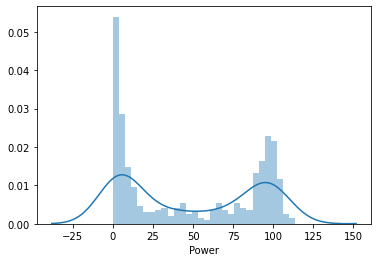

In [3]:
power_hist = sns.distplot(power, bins=30)
plt.xlabel("Power")
power_hist

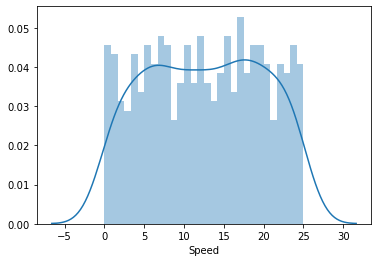

In [4]:
speed_hist = sns.distplot(speed, bins=30)
plt.xlabel("Speed")
speed_hist

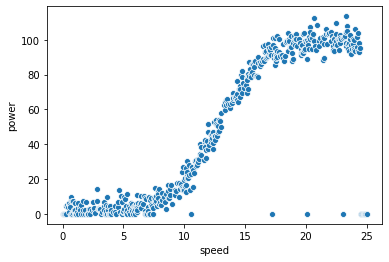

In [5]:
scatter = sns.scatterplot(x=df["speed"], y=df["power"])

<br>

***

### 1.2. Glossary of Terms

#### 1.2.1. Coefficients <span style="color: blue;">(*coef*)</span>

In the regression of a dataset, the coefficients describe the statistical relationship between the independent variables and the dependent variables.

The sign of the coefficent can tell you the direction of the relatioship between the variables. A positive sign identifies that as the independent variable increases, the mean of the dpendent variable also increases, whislt a negative sign suggests a decrease.

The value of the coefficient describes how the mean of the dependent variable changes in relation to the independent variable.

Whilst carrying out regression on an indepedent variable and a dependent variable, it is important to hold the other variables 'constant'. That is to say it is imperative to study the effect of the independent variable on each dependent variable in isolation from the others (statisticsbyjim.com).

The coefficients of the output are estimates of the actual data population, therefore, it is important to ensure that the model for regression follows best practice for that particular type of regression.

***

#### 1.2.2. Standard Error of the Coefficient  <span style="color: blue;">(*SE coef.* or *Std. Err.*)</span> and t-value  <span style="color: blue;">(*t*)</span>

The Standard Error measures the accuracy of the unknown coefficient of the model. It is a floating point number that is always positive. The smaller the Std. Err. the more accurate the estimate is (Minitab.com). 

Dividing the coefficient by the standard error will produce a t-value or t-statistic. As a lower Std. Err. indicates lower error and the t-value calculates how many times the error divides into the coefficent itself, a larger t-value indicates greater accuracy. 

As a result, the t-value is essentially a measure of the error in relation to the coefficient.

***

#### 1.2.3. P-Values  <span style="color: blue;">(*p*)</span>, the Null Hypothesis <span style="color: blue;">(*H0*)</span> and the Significance Level  <span style="color: blue;">(*α* or *alpha level*)</span>   

P-values work together with Coefficients to indicate to the statistical value produced in the Regression process. Specifically, the P-values *of* the coefficients identify whether the relationships observed in a sample exist throughout the population (StatisticsByJim). 

The p-value is a number between 0 and 1.

For each independent variable, there is a possibility that the variable has no correlation to the dependent variable, in which case there is not enough proof to display a relationship. This lack of a relationship is known as the Null Hypothesis and the P-values can test for this.

If it is first necessary to reject the Null Hypothesis in order to determine that there is a significant enough effect between the variables in your sample in order to conclude that the same effect is present in the wider population. The significance level is the probability of dismissing the Null Hypothesis when it in fact is evident.

The Significane Level, is a pre-determined threshold. It is normally set to a value of 0.05 (5%). However, the researcher must identify an appropriate threshold of Significance Level, from which to compare to the p-value.

If the P-value is less than the significance level, the Null Hypothesis can be sufficiently rejected. 

Contrasly, if the P-value is higher than the significance level, the Null Hypothesis cannot be rejected and there is not enough evidence to infer a relationship between the independent and dependent variable.

As the coefficients, P-values and the Significance level are determined for each variable in isolation, this can determine what variables should be included in the Regression analysis. 


***

<br>

***

### 1.3. Basic Example of Simple Linear Regression Using Numpy's Polyfit Function

Numpy has a built-in function to fit a straight line across a series of data points. The numpy.polyfit() function takes two arrays as input, x and y - these operate as the first and second parameters respectively. The third parameter specifies the degree of the polynomial function. For straight lines, the degree parameter is set at 1.

The example below from finxter.com outlines simple linear regression using numpy.polyfit().

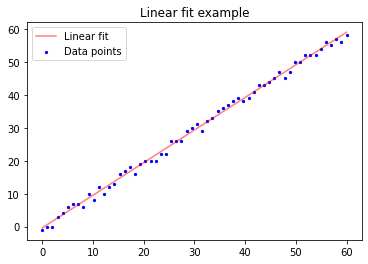

In [6]:
import numpy as np
from numpy import random  #it will be useful for generating some random noise (on purpose) in the data points that we want to fit
import matplotlib.pyplot as plt  #for plotting the data
#---LINEAR FIT----
#generate the x array
x = np.linspace(0,60,60) # generate an array of 60 equally space points
#generate the y array exploiting the random.randint() function to introduce some random noise
y = np.array([random.randint(i-2, i+2) for i in x]) #each element is a random number with value between +-2 the respective x axis value
#Applying a linear fit with .polyfit()
fit = np.polyfit(x,y,1)
ang_coeff = fit[0]
intercept = fit[1]
fit_eq = ang_coeff*x + intercept  #obtaining the y axis values for the fitting function
#Plotting the data
fig = plt.figure()
ax = fig.subplots()
ax.plot(x, fit_eq,color = 'r', alpha = 0.5, label = 'Linear fit')
ax.scatter(x,y,s = 5, color = 'b', label = 'Data points') #Original data points
ax.set_title('Linear fit example')
ax.legend()
plt.show()

#### reference: https://blog.finxter.com/np-polyfit/#:~:text=In%20Numpy%2C%20the%20function%20np.&text=The%20.-,polyfit()%20function%2C%20accepts%20three%20different%20input%20values%3A%20x%20%2C,degree%20of%20our%20polynomial%20function.

As seen in the above graph, a number of Numpy functions have been used in unison to first create a series of evenly distribution datapoints using np.linspace() , then randomly adding 'noise' to this data (creating random permutations to the data) using np.random.randint() and finally plugging the x and y arrays into a polyfit() function with the degree parameter set to 1.

The result is a scatterplot of seemingy random data that shows a consistent trend increasing consitently in x and y values, whilst displaying noise. The polyfit() function has drawn the most appropriate straight line through this data. 

Although it is not clear, the polyfit() function has determined the 'cost' of the datapoints. This is where the distance of each y datapoint is measured respectively to the line and these distances are added up to a total. The 'cost' is a measure of the degree of inaccuracy that is permitted when attempting to draw a straight line amongst dispersed datapoints. 

The functiond determines the lowest cost in order to apply the most appropriate line between the datapoints. It is impossible to create a line that has a cost of 0, as the datapoints would need to be perfectly in line for this to occur, in which case there would be no need to carry out simple linear regression.

In light of this, it is important to note that simple linear regression has most use in real world data, where it is difficult to intuitively determine the position of the most appropriate straight line using the eye alone.

<br>

***

### 1.4. Logistic Regression

Logistic Regression differs from Simple Linear Regression in that it investigates the relationship between a dependent *binary* variable  and one or more independent variable (of many types). It is not confined to quantitative data: the binary dependent variable may be a "yes" or "no" responses in a survey for example. 

The independent variable may be any of the following types (statisticshowto.com):

* Nominal Variable - classified as a categorical variable where data is not numerical and has no natural order, e.g. hair colour.


* Ordinal Variable - also a categorical variable, except where there is a natural order, e.g. a list of survey responses ranging from "Extremely Satisfied" to "Extremely Dissatisfied".


* Interval Variable - a numerical variable where each possible value are equally spaced, e.g. a list of temperature measurements in degrees Celcius and where 0 is a possible result.


* Ratio Variable - a numerical variable where the inerval is equal but 0 is not a possible value, e.g. age or weight.

An example use of Logistic Regression is determining whether calorie intake, ago, fat intake and time spent exercising influence the possibility of a heart attack (yes or no), where the latter binary response is determined from the independent variables. 

**This form of Regression will not be appropriate in examining the Powerproduction dataset.**

<br>

***

### 1.5. Non-linear Regression

#### What Differentiates Non-linear from Linear Regression

Non-linear Regression relates two variables (x and y) in a curved relationship. Simple Linear Regression involves calculating the sum of the distance of each y datapoint to a fitted line of regression. As previously stated, this is known as the cost of the datapoints. 

Non-linear Regression also calculates the cost of the datapoints in respect to the y variables, however each measure of the distance for each y datapoint to the fitted line, is squared before the values are summed together. This is known as the Sum of the Squares (Investopedia). 

The image below outlines an example of Non-linear Regression:

<img src="https://stats.idre.ucla.edu/wp-content/uploads/2016/02/alsmsasch13_1.gif" style="width: 450px;">

*Image from UCLA Institute for Digital Research and Education*

As such Non-linear Regression is a curved function of the X-variable. This is a more complicated process than Linear Regression as they require approximations or iterations and mathematical methods have been developed to make this as accurate as possible.  

It is important to note that **Linear Regression models can in certain circumstances form curved lines**. 

Similarly, **Non-linear models can be manipulated to reflect a near-straight line**, in which case the model is termed *instrinsically linear* (Investopedia). 

#### Applications of Linear Regression

##### Population Growth

A bivariate plot displaying population growth against time. However, this is a non-linear theory in that it does not produce a straight line. It would produce a curved line. 

***

#### Basic Example of Non-linear Regression Using Numpy's polyfit()

Once again, we will use Numpy's polufit() method to generate a plot of population create using Non-linear Regression. This example is taken from Scipy-Cookbook.com.

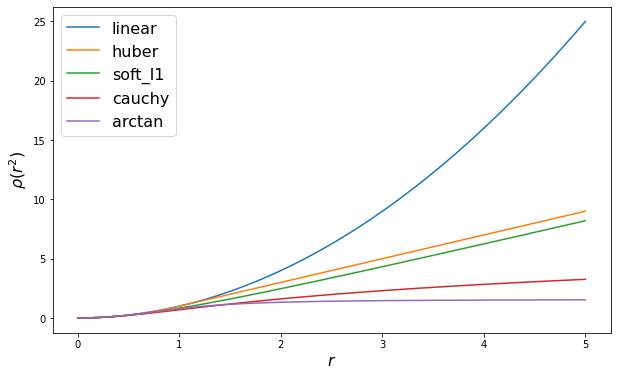

In [277]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from matplotlib import rcParams
rcParams['figure.figsize'] = (10, 6)
rcParams['legend.fontsize'] = 16
rcParams['axes.labelsize'] = 16
r = np.linspace(0, 5, 100)

linear = r**2

huber = r**2
huber[huber > 1] = 2 * r[huber > 1] - 1

soft_l1 = 2 * (np.sqrt(1 + r**2) - 1)

cauchy = np.log1p(r**2)

arctan = np.arctan(r**2)

plt.plot(r, linear, label='linear')
plt.plot(r, huber, label='huber')
plt.plot(r, soft_l1, label='soft_l1')
plt.plot(r, cauchy, label='cauchy')
plt.plot(r, arctan, label='arctan')
plt.xlabel("$r$")
plt.ylabel(r"$\rho(r^2)$")
plt.legend(loc='upper left');

<br>

***

### 1.6. Attempting Simple Linear Regression on Powerproduction Dataset

We will not attempt to carry out Simple Linear Regression on the Powerproduction Dataset using Numpy's polyfit() method. This is necessary to understand whether Simple Linear Regression is appropriate for this data.

At a later point, we will create our own version of the polyfit() method in order to carry out regression without Numpy.

Below, the Powerproduction dataset has been turned into a Pandas DataFrame and the two variables plotted on a scatterplot.

Following this, a straight line is plotted.

In [283]:
import pandas as pd
import seaborn as sns

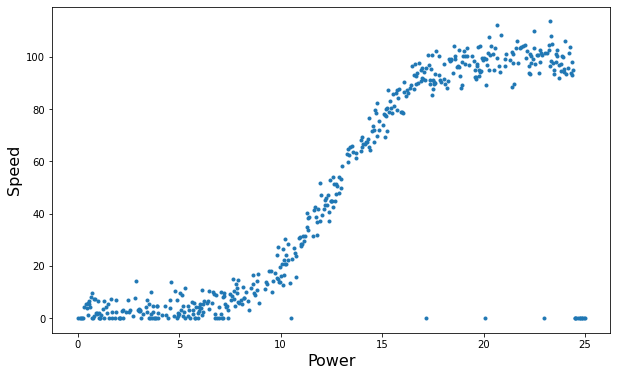

In [284]:
Plot_1 = plt.plot(speed, power, '.')
plt.xlabel("Power")
plt.ylabel("Speed")

Plot_1

Examining the above graph, a curve is noticed in the data as Speed and Power increase. There is a strong concentration of vectors in the bottom left: 0-8 for Speed and 0-10 for Power. Furthermore, there is a concentration in the top right: 17-35 for Speed and 90-110 for Power. Infact it appears from simply looking at the plot that the majority of the vectors of the dataset are located in these two zones.

The dispersion of datapoints will be further explored to examine the relationship. This relationship could be explained by a particular phenomenon that occurs when producing power from wind resources. 

For now, the plot is enough to assume that simple linear regression may not be appropriate for this dataset.

Nevertheless we will carry out Simple Linear Regression on this dataset.

TypeError: expected 1D vector for x

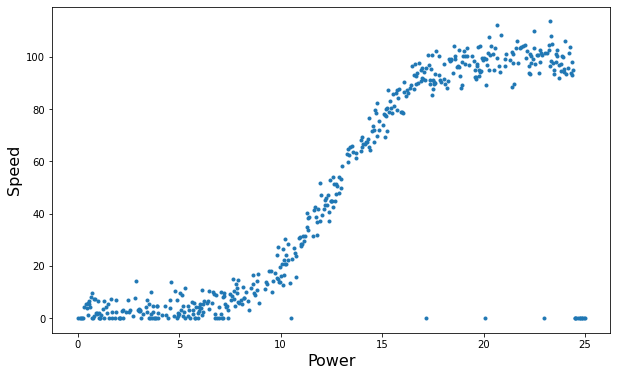

In [287]:
Plot_2 = plt.plot(speed, power, '.')
plt.xlabel("Power")
plt.ylabel("Speed")

coeffs = np.polyfit(speed, power, 1)

plt.plot(speed, coeffs[0] * speed + coeffs[1], '-')

Plot_2

Considering that Simple Linear Regression produces a line that does not fit well, it is evident that we must turn to Non-linear Regression, i.e. fitting a curved line, in order to fit the most appropriate line to the dataset.

<br>

***

### 1.8. What Does Curve Fitting Require?

#### The Basis Function

Curve fitting first requires creating the form of the *Mapping Function*, this is known as the *Basis Function*. 

To begin with, we do not yet know the form of the Mapping function that maps examples of inputs and outputs, but we can approximate it by creating the Basis function (Machine Learning Mastery).

Once the Basis Function has been approximated, the parameters to the function can be identified that result in the least amount of error. 

By comparing the output from the Basis Function to the observed output, we can calculate the error.

When there are two variables involved in a dataset, as there is with the Powerproduction Dataset, the independent variable will form the input of the Mapping function, whilst the dependent variable will form the output.





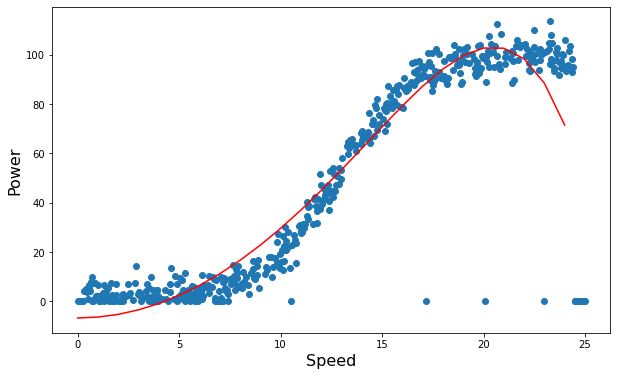

In [288]:
# define the basis function
def basis(x, a, b, c):
    return a * np.power(x, 7) + b * x**2 + c

# choose the input and output variables
x, y = df["speed"], df["power"]
# curve fit
exponents, _ = curve_fit(basis, x, y)
# summarize the parameter values
a, b, c = exponents

# plot inputs and outputs
plt.scatter(x, y)

# Use np.arange to inputs from smallest vector to largest
x_array = np.arange(min(x), max(x), 1)
# calculate the output for the range
y_array = basis(x_array, a, b, c)
# create a line plot for the mapping function
plt.plot(x_array, y_array, color='red')
plt.xlabel("Speed")
plt.ylabel("Power")

plt.show()

<br>

***

### 2.1. Carrying Out Simple Linear Regression Using Sklearn

In [269]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.optimize import curve_fit

from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LassoCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error

In [270]:
df = pd.DataFrame(pd.read_csv("powerproduction.txt") )

# Reshape both columns to be 2D and name as x/y
x = df["speed"]
x = x.values.reshape(500, 1)

y = df["power"]
y = y.values

#Split the dataset into Training set and Test Set, set test_size to
# 2.5: train is 75% the size of the ful dataset and test is 25% the 
# size of full dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                    test_size= 0.25, random_state=0)


# Print the 2 train and 2 test arrays to screen
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

# Create model variable, set to LinearRegression() function
# Use .fit() to adust weight of x and y data
model = LinearRegression().fit(x_train, y_train)

# Use the trained model to predict tests
y_predict = model.predict(x_test)

# Print first 5 rows of x_test predicted data
print(y_predict[0:5])

(375, 1) (375,)
(125, 1) (125,)
[10.34187937 48.33946996 56.98236455 95.58826698 99.72965396]


In [271]:
model.score(x_train, y_train)

0.7228817156951498

In [272]:
model.score(x_test, y_test)

0.7464131693198832

In [276]:
model.coef_

array([4.8664947])

### Scatterlot of Training Data and Test Data With Regression

Text(0, 0.5, 'Modelled Power (Dependent Variable)')

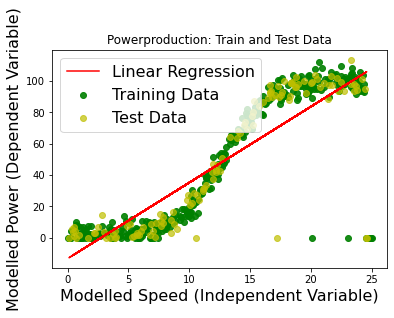

In [274]:
plt.plot(x_test, y_predict, color='r', label="Linear Regression")

plt.scatter(x_train, y_train, label="Training Data", color='g', 
            alpha=.9)
plt.scatter(x_test, y_test, label="Test Data", color='y', alpha=.7)
plt.legend()
plt.title("Powerproduction: Train and Test Data")
plt.xlabel("Modelled Speed (Independent Variable)")
plt.ylabel("Modelled Power (Dependent Variable)")

In [275]:
x_test.shape 

(125, 1)

### Scatterplot of Simple Linear Regression of Full Dataset

Text(0, 0.5, 'Test Power (Dependent Variable)')

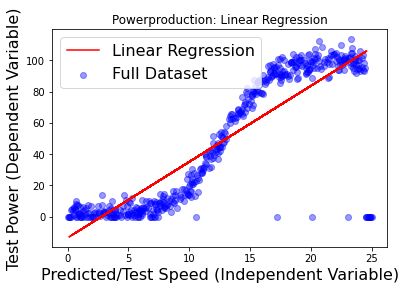

In [268]:
plt.plot(x_test, y_predict, color='r', label="Linear Regression")

# Create a scatterplot graphing predictions against true data
plt.scatter(x, y, color='b', label="Full Dataset",
        alpha=.4)

plt.legend()
plt.title("Powerproduction: Linear Regression")
plt.xlabel("Predicted/Test Speed (Independent Variable)")
plt.ylabel("Test Power (Dependent Variable)")

In [50]:
MAE = mean_absolute_error(y_test, y_predict)
MAE

14.777550003831136

### GradientBoostingRegressor()

In [51]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(random_state=0).fit(x_train, y_train)
model.score(x_train, y_train)

0.9936638387860953

In [52]:
model.score(x_test, y_test)

0.9186492370852416

In [53]:
model.score(x_test, y_test)

0.9186492370852416

### RandomForestRegressor()

In [54]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=0).fit(x_train, y_train)
model.score(x_train, y_train)

0.9923521043138447

In [55]:
model.score(x_test, y_test)

0.9197602248970694

In [56]:
model.score(x_test, y_test)

0.9197602248970694

### 2.2. Polynomial Linear Regression Using Sklearn

#### What is it?

Polynomial Regression is is a type of regression analysis where the relationship between the independent variable (x) and dependent variable (y) are modelled as the *nth degree* in x.

The word Polynomial comes from the Greek word 'poly' meaning many and the Latin word 'nomial' meaning terms. Therefore, it directly translates as 'many terms'. 

This applies to Polynomial Regression, whereby, the Polynomial equations that drive the analysis models contain a number of terms.

This is demonstrated by the graph below, whereby a polynomial is presented that contains 3 terms, one cubic, one quadratic and one linear, as well as a leading coefficient and a constant.

<img src="https://slideplayer.com/slide/14484666/90/images/7/%F0%9D%9F%91%F0%9D%92%99+%F0%9D%9F%91+%E2%88%92+%F0%9D%9F%93%F0%9D%92%99+%F0%9D%9F%90+%E2%88%92%F0%9D%9F%90%F0%9D%92%99%2B%F0%9D%9F%8F+Parts+of+a+polynomial+Cubic+term+Linear+term.jpg" style="width: 450px;"> 



The models produced by Polynomial Regression, are non-linear as they produce estimations that do not fit a straight line. It fits a non-linear relationship between the value of x and the corresponding conditional mean of y, denoted as *E(y|x)* (i2tutorials). 

Despite fitting a non-linear model, Polynomial Regression operates as a linear statistical estimator. 

Furthermore, Polynomial Regression is a special case of Multiple Linear Regression.

#### Utility for Powerproduction Dataset

As previously demonstrated, Simple Linear Regression did not produce satisfactory estimation of the relationship between the independent variable *speed* or the dependent variable *power*. This was the case for both regression using Numpy and tha of Sklearn.

<br>

***

### Creating Test and Training Data for Polynomial Regression

In [256]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures


x = df["speed"]
y = df["power"]
y = y.values

# Use old seeding method on numpy to provide random train and 
# test variables
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                    test_size= 0.25, random_state=0)

# transform the data to include another axis
x_train = x_train[:, np.newaxis]
y_train = y_train[:, np.newaxis]
x_test = x_test[:, np.newaxis]
y_test = y_test[:, np.newaxis]

# Create variable featuring Polynomial of 3 degrees and fit to 
# the standardized features of x_train using .fit_transform()
x_poly = PolynomialFeatures(degree=3).fit_transform(x_train)

# Assign model variable to LinearRegression()fitted with x_poly and y_train
model = LinearRegression().fit(x_poly, y_train)

# Assign prediction variable to the prediction of x_poly
y_poly_pred = model.predict(x_poly)

import operator

# Use operator.itemgetter with sorted to zip items from x_train and 
# y_poly_pred together to provide data for regression line
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x_train,y_poly_pred), key=sort_axis)
x_pred, y_poly_pred = zip(*sorted_zip)

### Scatterplot of Polynomial Regression of Test/Training Data

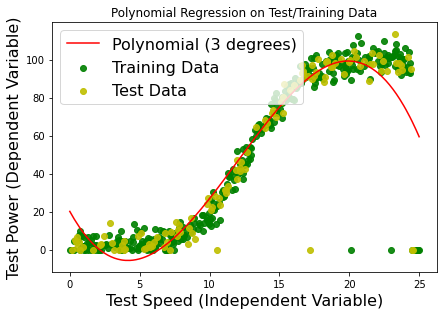

In [258]:
# Plot test data and training data on scatterplots
plt.scatter(x_train, y_train, color='g', label="Training Data", alpha=0.9)
plt.scatter(x_test, y_test, color='y', label="Test Data", alpha=0.9)

# Plot zipped data for regression line and format with labels, legend
# and title
plt.plot(x_pred, y_poly_pred, color='r', label="Polynomial (3 degrees)")

plt.legend()
plt.tight_layout()
plt.title("Polynomial Regression on Test/Training Data")
plt.xlabel("Test Speed (Independent Variable)")
plt.ylabel("Test Power (Dependent Variable)")
plt.show()

#### The model coefficients are:

In [243]:
model.coef_

array([[  0.        , -13.33262227,   1.93710856,  -0.05363941]])

<br>

***

### Scatterplot of Polynomial Regression on Real Data

In [244]:
# Load in real variables variables
x = df["speed"]
y = df["power"]
y = y.values

# Add new axis to x and y arrays to allow splitting
x = x[:, np.newaxis]
y = y[:, np.newaxis] 

# Create variable featuring Polynomial of 3 degrees and fit to 
# the standardized features of x_train using .fit_transform()
polynomial_features= PolynomialFeatures(degree=3).fit_transform(x)
x_poly = polynomial_features

model_2 = LinearRegression().fit(x_poly, y)
y_poly_pred = model_2.predict(x_poly)

# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)


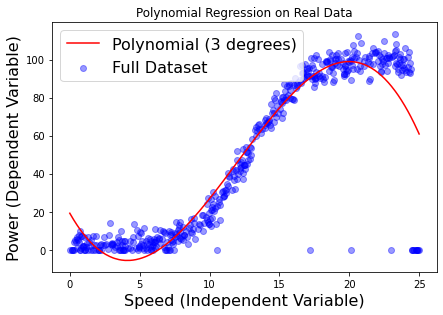

In [241]:
# Plot real 'speed' and 'power' data on scatterplots
plt.scatter(x, y, color='b', label="Full Dataset", alpha=0.4)

# Plot zipped data for regression line and format with labels, legend
# and title
plt.plot(x, y_poly_pred, color='r', label="Polynomial (3 degrees)")

plt.legend()
plt.tight_layout()
plt.title("Polynomial Regression on Real Data")
plt.xlabel("Speed (Independent Variable)")
plt.ylabel("Power (Dependent Variable)")
plt.show()

#### The model coefficients on the real data are:

In [242]:
model_2.coef_

array([[  0.        , -12.94285866,   1.89485751,  -0.05241927]])